## SQL FOR DATA ANALYSIS ON CHINOOK DATABASE:


In [418]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns


In [419]:
connection = psycopg2.connect(user = 'postgres',password = 'suryansh2794',host = 'localhost',port = '5432',
                             database = 'chinook_1')
ready = connection.cursor()


In [420]:
print(connection.get_dsn_parameters(),'\n')

{'user': 'postgres', 'dbname': 'chinook_1', 'host': 'localhost', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 



In [421]:
### top 10 artist query

In [422]:
query1 = " SELECT artist.name AS Popular_Artist ,count(genre.name) AS Songs FROM artist JOIN album ON album.artist_id = artist.artist_id JOIN track ON album.album_id = track.album_id JOIN genre ON track.genre_id = genre.genre_id GROUP BY artist.name ORDER BY 2 DESC LIMIT 20 " 
ready.execute(query1)

In [423]:
q1 = ready.fetchall()

In [424]:
q1 = pd.DataFrame(q1)
q1.columns = ['Popular Artist','Songs Played'] 

In [425]:
q1

,Popular Artist,Songs Played
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Deep Purple,92
5,Lost,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53


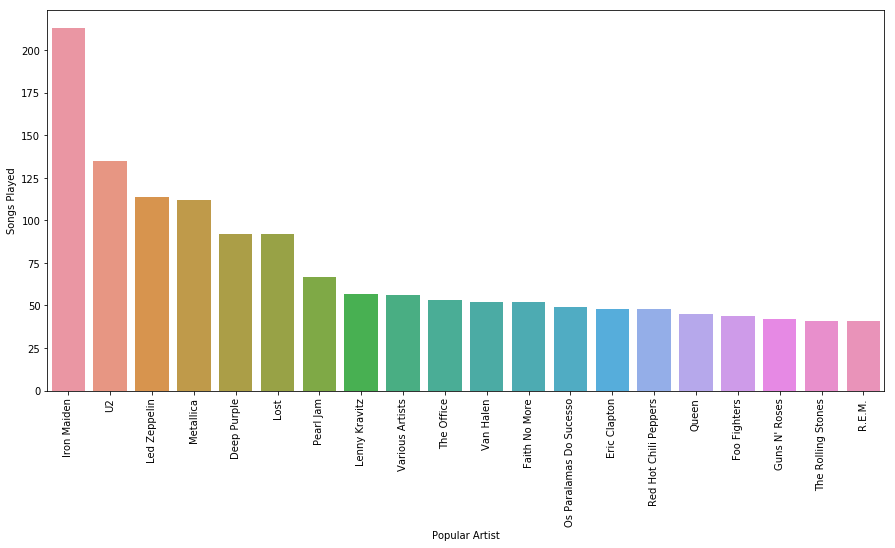

In [426]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Popular Artist',y = 'Songs Played', data = q1)
plt.xticks(rotation = 90)
plt.show()

In [427]:
## POPULAR GENRE

In [428]:
query2 = "SELECT genre.name , Count(genre.Name) AS Popular_Genre FROM Customer join invoice ON customer.customer_id = invoice.customer_id JOIN invoice_line On invoice.invoice_id = invoice_line.invoice_id Join track ON invoice_line.track_id=track.track_id Join genre On track.genre_id= genre.genre_id Group BY genre.name ORDER BY Popular_Genre DESC LIMIT 20"
ready.execute(query2)
q2 = ready.fetchall()
q2 = pd.DataFrame(q2)
q2.columns = ['Genre','Popular_Genre']


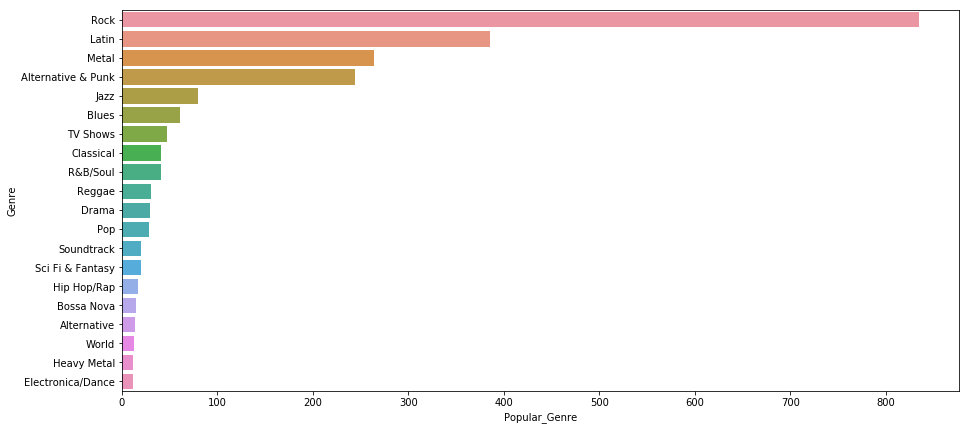

In [429]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Popular_Genre',y = 'Genre', data = q2)
#plt.xticks(rotation = 90)
plt.show()

In [430]:
## EXPENSIVE SONGS:

In [431]:
query3 = "SELECT artist.name AS Artist_Name , sum(invoice_line.unit_price*invoice_line.quantity)AS Song_Cost FROM invoice JOIN invoice_line ON invoice.invoice_id = invoice_line.invoice_id Join customer On invoice.customer_id = customer.customer_id JOIN track ON track.track_id = invoice_line.track_id JOIN album ON album.album_id= track.album_id JOIN artist ON artist.artist_id= album.artist_id GROUP BY artist.name order by Song_Cost desc LIMIT 20"
ready.execute(query3)
q3 = ready.fetchall()
q3 = pd.DataFrame(q3)
q3.columns = ['Artist_Name','Song_Cost']

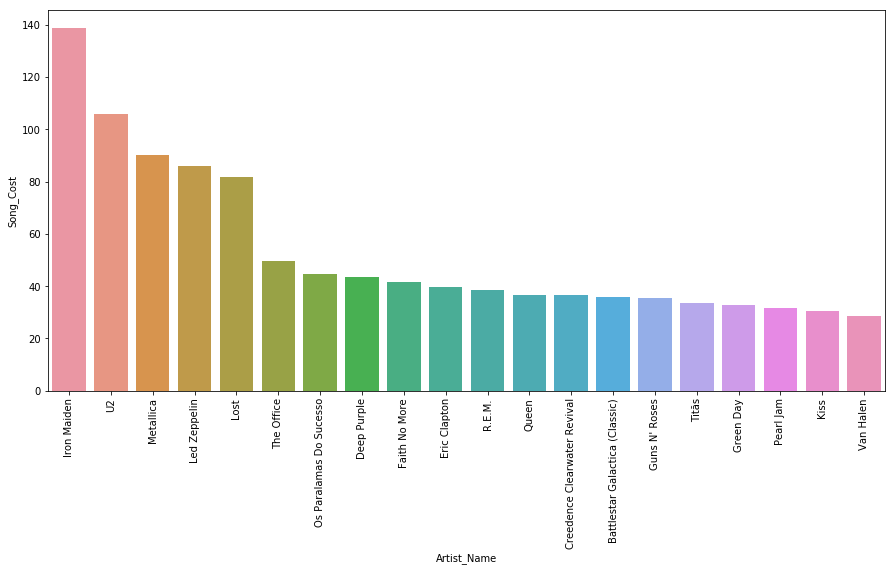

In [432]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Artist_Name',y = 'Song_Cost', data = q3)
plt.xticks(rotation = 90)
plt.show()

In [433]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
Artist_Name    20 non-null object
Song_Cost      20 non-null object
dtypes: object(2)
memory usage: 400.0+ bytes


In [434]:
## WHO MADE IRON MAIDEN THE RICHEST. 

In [435]:
query4 = "SELECT  sum(invoice_line.unit_price*invoice_line.quantity)AS SongCost, customer.first_name,customer.last_name FROM invoice JOIN invoice_line ON invoice.invoice_id = invoice_line.invoice_id Join customer On invoice.customer_id = customer.customer_id JOIN track ON track.track_id = invoice_line.track_id JOIN album ON album.album_id= track.album_id JOIN artist ON artist.artist_id= album.artist_id WHERE artist.name = 'Iron Maiden' GROUP BY customer.customer_id ORDER by SongCost DESC LIMIT 20"
ready.execute(query4)
q4 = ready.fetchall()
q4 = pd.DataFrame(q4)
q4.columns = ['SongCost','First_Name','Last_Name']

In [436]:
q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
SongCost      20 non-null object
First_Name    20 non-null object
Last_Name     20 non-null object
dtypes: object(3)
memory usage: 560.0+ bytes


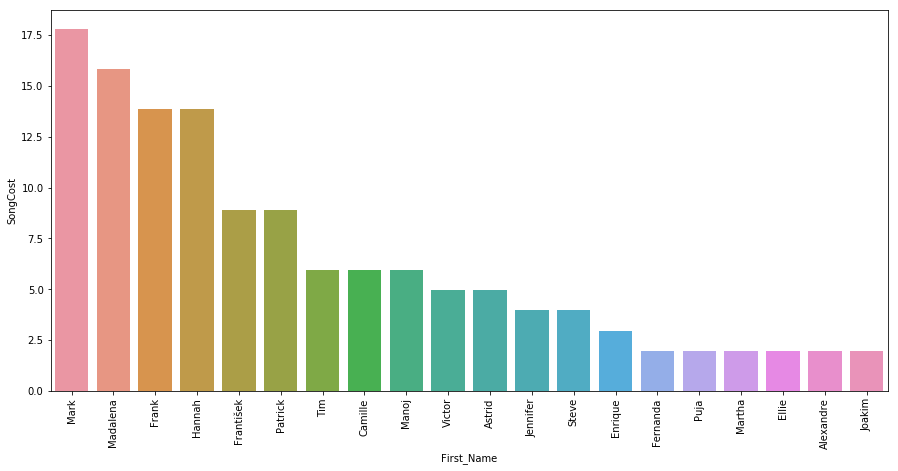

In [437]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'First_Name',y = 'SongCost', data = q4)
plt.xticks(rotation = 90)
plt.show()

In [438]:
## choice to buy albums among customers.

In [439]:
#query5 = " SELECT cd.country_other country,COUNT(cd.customer_id) num_customers,SUM(i.total) total_sales, ROUND(CAST(SUM(i.total) as float) / COUNT(DISTINCT(cd.customer_id)),2) avg_sales_per_cust,ROUND(AVG(i.total),2) avg_order_value FROM country_data cd INNER JOIN invoice i ON i.customer_id = cd.customer_id GROUP BY 1 ORDER BY CASE WHEN country = "Other" THEN 0 ELSE total_sales END DESC "

In [440]:
## most popular music genres in america.

In [441]:
query6 = "WITH usa_sales AS (SELECT SUM(quantity) total FROM invoice_line il INNER JOIN invoice i ON i.invoice_id = il.invoice_id WHERE i.billing_country = 'USA') SELECT g.name genre,SUM(il.quantity) num_sold,(CAST(SUM(il.quantity) as float) / (SELECT total FROM usa_sales)) * 100 percent_sold FROM invoice_line il INNER JOIN invoice i ON i.invoice_id = il.invoice_id INNER JOIN track t ON il.track_id = t.track_id INNER JOIN genre g ON t.genre_id = g.genre_id WHERE i.billing_country = 'USA' GROUP BY 1 ORDER BY 2 DESC "
ready.execute(query6)
q6 = ready.fetchall()
q6 = pd.DataFrame(q6)
q6.columns = ['genre','num_sold','percent_sold']

In [442]:
q6

,genre,num_sold,percent_sold
0,Rock,157,31.781377
1,Latin,91,18.421053
2,Metal,64,12.955466
3,Alternative & Punk,50,10.121457
4,Jazz,22,4.453441
5,Blues,15,3.036437
6,TV Shows,14,2.834008
7,R&B/Soul,12,2.429150
8,Classical,8,1.619433
9,Comedy,8,1.619433


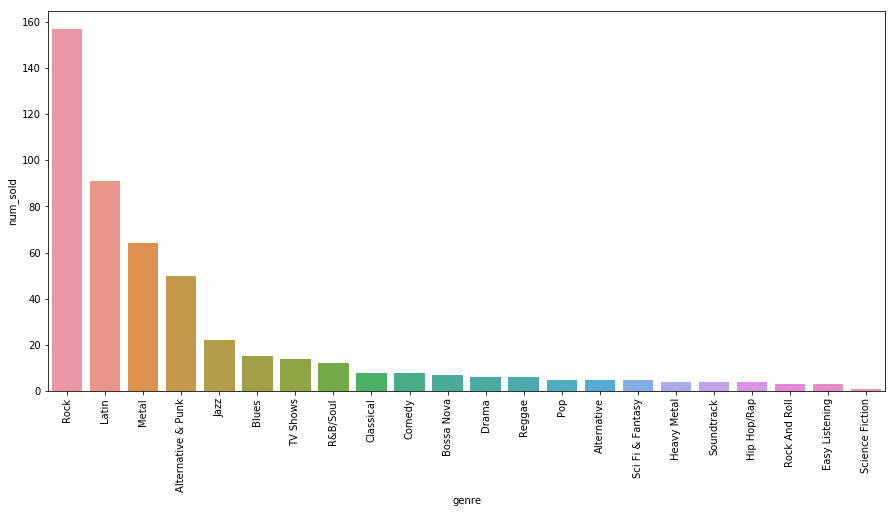

In [443]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'genre',y = 'num_sold', data = q6)
plt.xticks(rotation = 90)
plt.show()

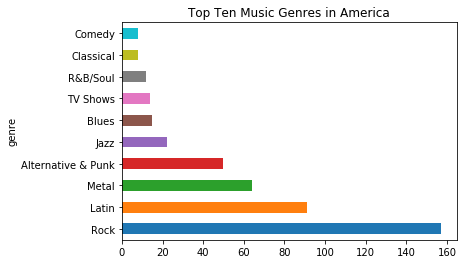

In [444]:
q6.set_index('genre', drop=True, inplace=True)
colors = [(31/255, 119/255, 180/255), (255/255, 127/255, 14/255), (44/255, 160/255, 44/255), (214/255, 39/255, 40/255), (148/255, 103/255, 189/255), (140/255, 86/255, 75/255), (227/255, 119/255, 194/255), (127/255, 127/255, 127/255), (188/255, 189/255, 34/255), (23/255, 190/255, 207/255),(148/255, 103/255, 189/255), (140/255, 86/255, 75/255)]
q6.num_sold.iloc[:10].plot.barh(title = "Top Ten Music Genres in America", color=colors)

G:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


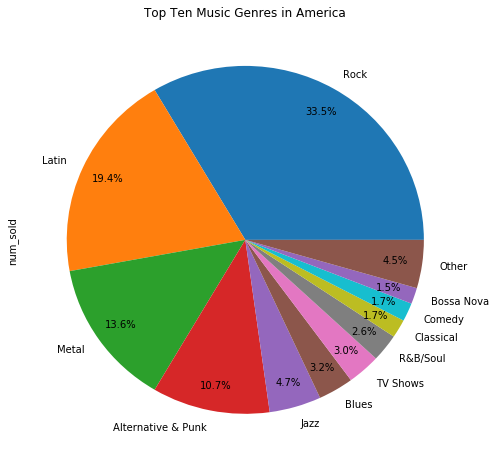

In [445]:
# Create an "other" category for better visualization.
# Select all genres that have more than 1% of the total.
q6 = q6.iloc[:11]
q6.loc["Other"] = 21
q6.num_sold.plot.pie(figsize=(8,8), colors=colors,
                                     title = "Top Ten Music Genres in America",
                                     autopct='%1.1f%%', pctdistance = 0.85)

In [447]:
## Employee sales performance:

In [448]:
query7 = " SELECT e.first_name||' '||e.last_name employee,e.hire_date, e2.first_name||' '||e2.last_name manager, SUM(i.total) total_sales FROM employee e INNER JOIN employee e2 ON e.reports_to = e2.employee_id INNER JOIN customer c ON c.support_rep_id = e.employee_id INNER JOIN invoice i ON c.customer_id = i.customer_id WHERE e.title = 'Sales Support Agent' GROUP BY e.hire_date,e.first_name||' '||e.last_name,e2.first_name||' '||e2.last_name ORDER BY 4 "
ready.execute(query7)
q7 = ready.fetchall()
q7 = pd.DataFrame(q7)
q7.columns = ['Employee','hire_date','Manager','Total_sales']

In [449]:
q7

,Employee,hire_date,Manager,Total_sales
0,Steve Johnson,2003-10-17,Nancy Edwards,720.16
1,Margaret Park,2003-05-03,Nancy Edwards,775.40
2,Jane Peacock,2002-04-01,Nancy Edwards,833.04


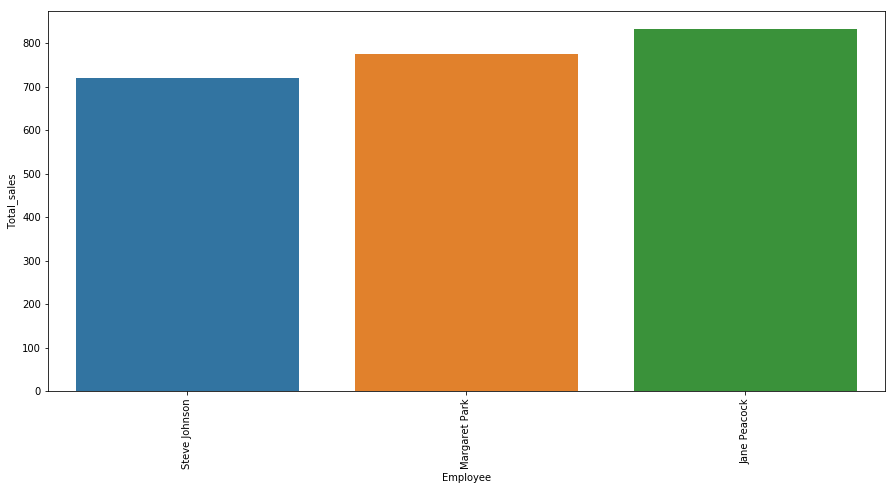

In [450]:
plt.figure(figsize= (15,7))
sns.barplot(x = 'Employee',y = 'Total_sales', data = q7)
plt.xticks(rotation = 90)
plt.show()

In [456]:
query8 = "SELECT distinct(invoice_date) FROM invoice ORDER BY invoice_date"
ready.execute(query8)
q8 = ready.fetchall()
q8 = pd.DataFrame(q8)


In [457]:
q8

,0
0,2009-01-01
1,2009-01-02
2,2009-01-03
3,2009-01-06
4,2009-01-11
5,2009-01-19
6,2009-02-01
7,2009-02-02
8,2009-02-03
9,2009-02-06


In [458]:
import datetime
import numpy as np
# Convert to datetime type
q7['hire_date'] = pd.to_datetime(q7['hire_date'])
# Create datetime object for "today"
today = datetime.datetime(year=2013, month=12, day=23)
# Calculate the length of tenure in months
q7['tenure'] = (today - q7['hire_date']) / np.timedelta64(1, 'M')
q7

,Employee,hire_date,Manager,Total_sales,tenure
0,Steve Johnson,2003-10-17,Nancy Edwards,720.16,122.220169
1,Margaret Park,2003-05-03,Nancy Edwards,775.40,127.706934
2,Jane Peacock,2002-04-01,Nancy Edwards,833.04,140.750323


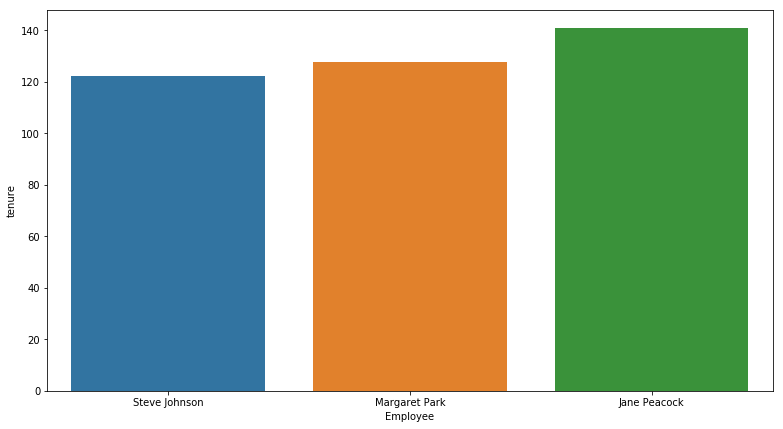

In [461]:
plt.figure(figsize = (13,7))
sns.barplot(x = 'Employee',y = 'tenure',data = q7)
plt.show()

In [455]:
### abhi k lie bs itna h experiment kafi hai.